In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from BaseModel import BinaryClassifier
from ConfigModel import *
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:

data = pd.read_csv("Performance.csv")
loss_train = data['Loss Train']
loss_test = data['Loss Test']
f1_train = data['F1 Train']
f1_test = data['F1 Test']
data.head()

,Loss Train,Loss Test,F1 Train,F1 Test
0,0.908394,0.794369,0.531613,0.583576
1,0.780192,0.766308,0.546197,0.614650
2,0.714038,0.741114,0.599297,0.588764
3,0.716614,0.745243,0.610325,0.644298
4,0.705080,0.732986,0.614256,0.561419


# LOSS AND F1-SCORE OVER EPOCHS #

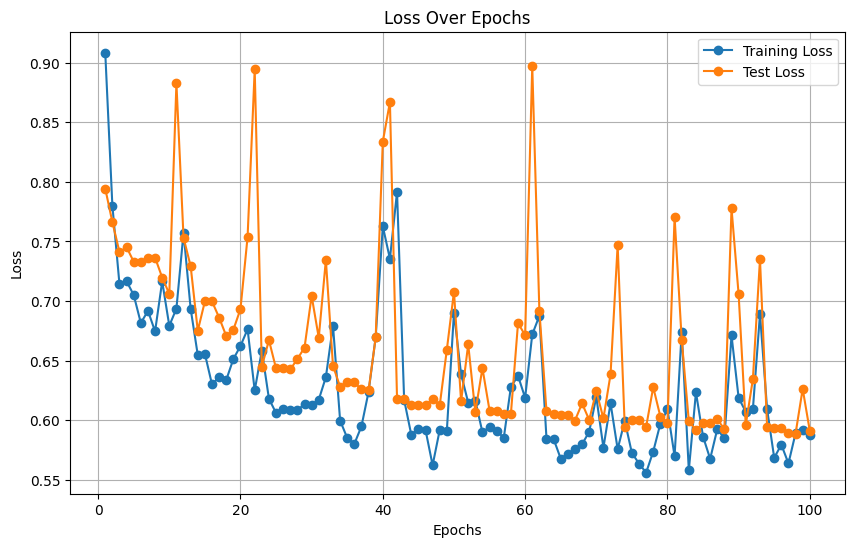

In [5]:

df = pd.read_csv("Performance.csv")
# Number of epochs
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train, label='Training Loss', marker='o')
plt.plot(epochs, loss_test, label='Test Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


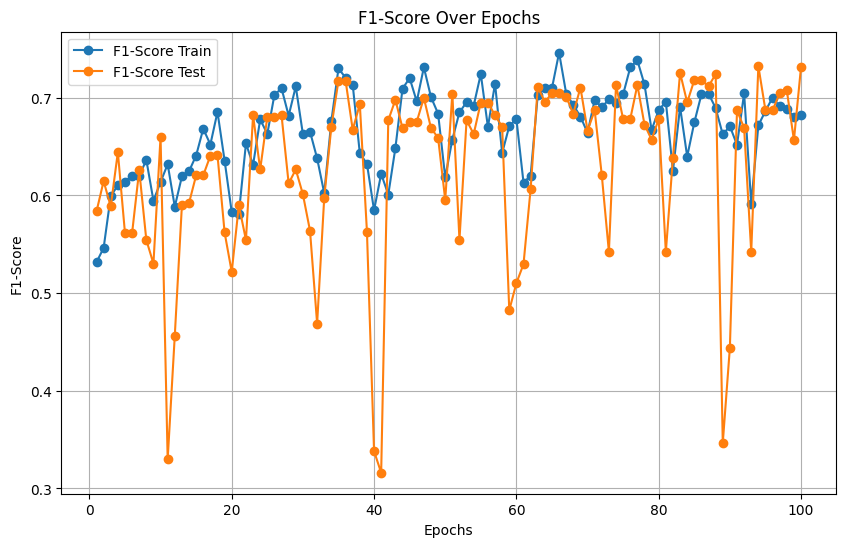

In [6]:
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, f1_train, label='F1-Score Train', marker='o')
plt.plot(epochs, f1_test, label='F1-Score Test', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# CONFUSION MATRIX

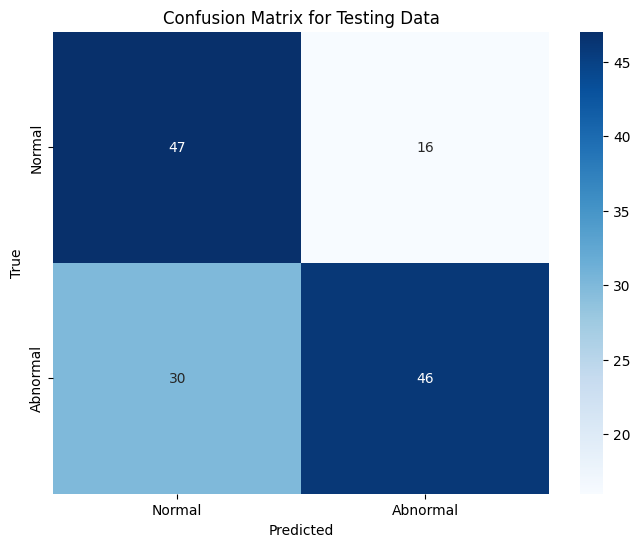

In [7]:
model = BinaryClassifier().to(DEVICE)
# Load the saved model
loaded_model = torch.load('model\weight')

# Set the model to evaluation mode
loaded_model.eval()

# Create lists to store true and predicted labels
true_labels_test = []
predicted_labels_test = []

# Evaluate the test data using the loaded model
with torch.no_grad():
    for inputs, labels in TESTLOADER:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE).long()
        outputs = loaded_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_test.extend(labels.tolist())
        predicted_labels_test.extend(predicted.tolist())

# Calculate the confusion matrix
confusion_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Define class labels if available
class_labels = ["Normal", "Abnormal"]  # Replace with your actual class labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Testing Data")
plt.show()

# Checking Gradient

<Figure size 1200x600 with 0 Axes>

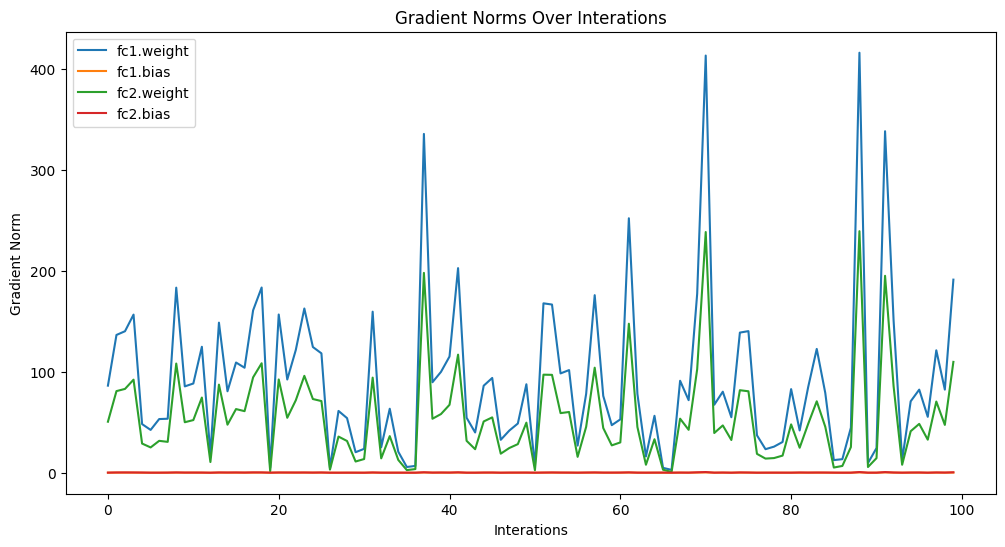

In [8]:
plt.figure(figsize=(12, 6))
data = pd.read_csv('EpochGradientNorms.csv')

# Plot the data
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Interations')
plt.ylabel('Gradient Norm')
plt.legend(loc ='upper left')
plt.title('Gradient Norms Over Interations')
plt.show()
